In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
r={}
e={}
d={}
#tsp case: (1,2)=1, (1,3)=1, (1,4)=2, (2,3)=3, (2,4)=4, (3,4)=2
tsp=nx.Graph()
tsp.add_edge(1,2,dist=1)
tsp.add_edge(1,3,dist=1)
tsp.add_edge(1,4,dist=2)
tsp.add_edge(2,3,dist=3)
tsp.add_edge(2,4,dist=4)
tsp.add_edge(3,4,dist=2)

#print tsp[1][4]

#r.setdefault(6,[]).append([1,2,3,4])
#r.setdefault(8,[]).append([1,3,2,4])
#r.setdefault(7,[]).append([1,4,3,2])
#r.setdefault(9,[]).append([1,4,2,3])

#r.setdefault((1,2,3,4),[]).append(6)
#r.setdefault((1,3,2,4),[]).append(8)
#r.setdefault((1,4,3,2),[]).append(7)
#r.setdefault((1,4,2,3),[]).append(9)

r[(1,2,3,4)]=6
r[(1,3,2,4)]=8
r[(1,4,3,2)]=7
r[(1,4,2,3)]=9

d[1]=(1,4)
d[2]=(4,2)

In [3]:
#test designs and valid decisions

def test_1(r,d):
    v_r=[]
    n=2
    m=1

    #parse routes
    for ri,s in r.iteritems():
        #print ri

        e_r=[tuple(ri[i:i+n-m+1]) for i in xrange(0,len(ri), n-m)]
        del e_r[-1]
        valid=True
        
        #if d not in e_r:
            #valid = False
        if not all(x in e_r for x in d):
            valid = False
            
        if valid or d==[]:
            v_r.append((s,ri))
    return v_r

In [137]:
def get_route(): #OLD#
    route=list(np.random.permutation(tsp.nodes()))
    #print route
    d=0.0
    for i in xrange(len(route)-1):
        u=route[i]
        v=route[i+1]
        d+=tsp[u][v]['dist']

    if d in r:
        if route not in r[d]:
            r.setdefault(d,[]).append(route)
        else:
            print 'caught',d,route
    else:
        r.setdefault(d,[]).append(route)

    print r

In [8]:
def entropy(r,d):
    v_r=test_1(r,d)
    l=[i[0] for i in v_r]
    #bins=xrange(min(l),max(l))
    hist,bin_edges=np.histogram(l,density=True)
    p=hist/hist.sum()
    a_p=np.array(p)
    a_p=a_p[np.nonzero(a_p)]
    h=-sum(a_p*np.log(a_p))
    
    return h
    
def e_entropy(r,d):
    v_r=test_1(r,d)
    d_tsp=tsp.to_directed()
    e=dict((i,0.0) for i in d_tsp.edges())
    for d,ri in v_r:
        for i in xrange(len(ri)-1):
            u=ri[i]
            v=ri[i+1]
            if (u,v) in e:
                e[(u,v)]+=1
            #elif (v,u) in e:
                #e[(v,u)]+=1
    l=np.array(e.values())
    p=l/sum(l)
    a_p=np.array(p)
    a_p=a_p[np.nonzero(a_p)]
    h=-sum(a_p*np.log(a_p))
    #plt.bar(range(len(e)), e.values(), align='center')
    #plt.xticks(range(len(e)), e.keys(), rotation=25)
    #plt.title('S={}'.format(h))
    
    return h
    
    

In [193]:
print r
print d

{(1, 4, 2, 3): 9, (1, 4, 3, 2): 7, (1, 2, 3, 4): 6, (1, 3, 2, 4): 8}
{1: (1, 4)}


In [14]:
#test designs and valid decisions

def test(r,d):
    v_r=[]
    n=2
    m=1

    #parse routes
    for s,r_all in r.iteritems():
        #print ri
        for ri in r_all:
            e_r=[tuple(ri[i:i+n-m+1]) for i in xrange(0,len(ri), n-m)]
            del e_r[-1]
            valid=True
            for tau,d_e in d.iteritems():
                if d_e not in e_r:
                    valid = False
                    break
            if valid:
                v_r.append((s,ri))
    return v_r

In [5]:
def landscape(r,d):
    v_r=test_1(r,d)
    l=[i[0] for i in v_r]
    h=entropy(r,d)
    plt.hist(l)
    plt.title('S={}'.format(h))
    
    
    
    #return v_r

In [4]:
def get_route(r):
    route=tuple(np.random.permutation(tsp.nodes()))
    #print route
    d=0.0
    for i in xrange(len(route)-1):
        u=route[i]
        v=route[i+1]
        d+=tsp[u][v]['dist']
        
    r[route]=d

    #print r
    return r

In [13]:
def e_eval(r,d):
    v_r=test_1(r,d)
    #route=[i[1] for i in v_r]
    n=len(v_r) #tsp.number_of_edges()
    d_tsp=tsp.to_directed()
    t_d=dict((i,0.0) for i in d_tsp.edges())
    n=dict((i,0.0) for i in d_tsp.edges())
    e=dict((i,0.0) for i in d_tsp.edges())
    for d,ri in v_r:
        for i in xrange(len(ri)-1):
            u=ri[i]
            v=ri[i+1]
            n[(u,v)]+=1
            t_d[(u,v)]+=d
    for k in n:
        if n[k]!=0.0:
            e[k]=t_d[k]/n[k]
        else:
            e[k]=0.0
    
    #print e
    #plt.bar(range(len(e)), e.values(), align='center')
    #plt.xticks(range(len(e)), e.keys(), rotation=25)
    
    return e,n
    
def decision(r,d):
    e,n=e_eval(r,d)
    n=clean_for_path(d)
    e_nz={}
    for e,v in e.iteritems():
        accept=1
        if not v:
            accept=0
            continue
        if e in d:
            accept=0
            continue
        if (e[0] not in n) or (e[1] not in n):
            accept=0
            continue
        
        if accept==1:
            e_nz[e]=v
        
        
    #e_nz={k: v for k, v in e.items() if v}
    #e_nz={k: v for k, v in e.items() if v not in d}
    min_value = min(e_nz.itervalues())
    min_keys = [k for k in e_nz if e_nz[k] == min_value]
    key=random.choice(min_keys)
    
    return key

def clean_for_path(d):
    valid_n=[]
    for n in tsp.nodes():
        c=0
        for e in d:
             if n in e:
                    c+=1
        if c<2:
            valid_n.append(n)
        
    return valid_n
        
    
    

In [284]:
a=test_1(r,d[3])
l=[i[0] for i in a]
print a
print l

[(9.0, (1, 4, 2, 3))]
[9.0]


In [144]:
get_route()

caught 6.0 [1, 2, 3, 4]
{9.0: [[3, 2, 4, 1], [1, 4, 2, 3]], 6.0: [[1, 2, 3, 4]], 7.0: [[2, 3, 4, 1]]}


In [185]:
r=get_route(r)

{(3, 1, 4, 2): 7.0, (3, 4, 1, 2): 5.0, (3, 4, 2, 1): 7.0, (1, 4, 2, 3): 9.0, (3, 2, 4, 1): 9.0, (2, 4, 3, 1): 7.0, (4, 3, 2, 1): 6.0, (2, 4, 1, 3): 7.0}


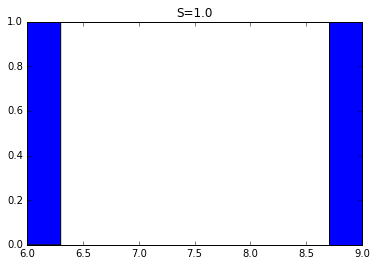

In [384]:
landscape(r,d[2])

In [14]:
r={}
d={0:[]}
d[1]=[(1,4)]
d[2]=[(1,4),(2,3)]
d[3]=[(1,4),(2,3),(4,2)]

23


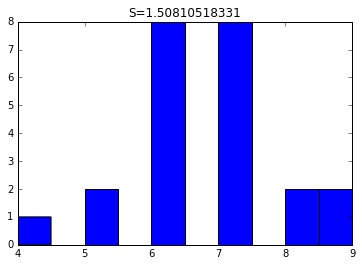

In [27]:
for i in xrange(6):
    r=get_route(r)
landscape(r,d[0])

print len(r)

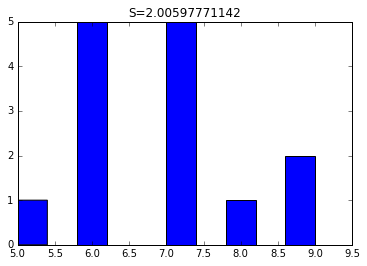

In [467]:
landscape(r,d[0])

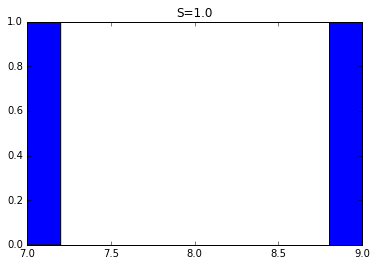

In [468]:
landscape(r,d[1])

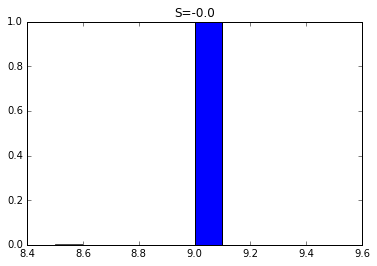

In [464]:
landscape(r,d[2])

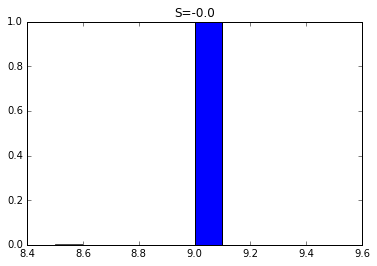

In [465]:
landscape(r,d[3])

1.56071040904
1.32966134885
0.69314718056
-0.0
1.09861228867


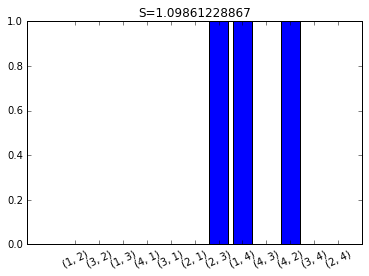

In [241]:
print entropy(r,d[0])
print entropy(r,d[1])
print entropy(r,d[2])
print entropy(r,d[3])

#print e_entropy(r,d[0])
#print e_entropy(r,d[1])
#print e_entropy(r,d[2])
print e_entropy(r,d[3])

In [23]:
l=[9.0,8.0,7.0]
f=[.5,.5,0.0,.2]
sum(l)
sum(f)

1.2

In [362]:
l=[.5,.5,0.0]
h=-sum(np.array(l)*np.log(np.array(l))
print h

In [369]:
l=np.array(l)
print l[np.nonzero(l)]

[ 0.5  0.5]


In [366]:
for i in l:
    if np.nonzero(i):
        print i, np.nonzero(i)

0.5 (array([0], dtype=int64),)
0.5 (array([0], dtype=int64),)
0.0 (array([], dtype=int64),)


In [357]:
l[l!=0.0]

8.0

In [374]:
r={}
d={0:[]}

edge 2.43261663762


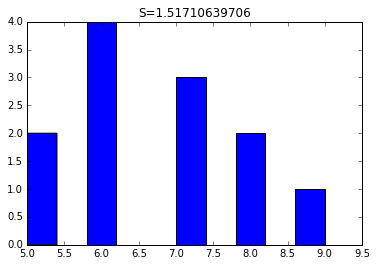

In [391]:
for i in xrange(1):
    r=get_route(r)
landscape(r,d[0])
print 'edge',e_entropy(r,d[0])

In [392]:
d[1]=[(1,2)]
d[2]=[(1,2),(2,3)]
print clean_for_path(d[2])


[1, 3, 4]


In [349]:
print decision(r,d[0])
d[1]=[decision(r,d[0])]
#print decision(r,d[1])
print e_eval(r,d[1])[0]

(1, 3)
{(1, 2): 0.0, (3, 2): 0.0, (1, 3): 5.0, (4, 1): 0.0, (3, 1): 0.0, (2, 1): 5.0, (2, 3): 0.0, (1, 4): 0.0, (4, 3): 0.0, (4, 2): 6.0, (3, 4): 4.0, (2, 4): 0.0}


In [202]:
e_d=dict((i,0) for i in tsp.edges())

print tsp.edges()
print e_d

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
{(1, 2): 0, (1, 3): 0, (1, 4): 0, (2, 3): 0, (3, 4): 0, (2, 4): 0}


In [427]:
e,n=e_eval(r,d[2])
print e

{(1, 2): 6.0, (3, 2): 0.0, (1, 3): 0.0, (4, 1): 6.0, (3, 1): 0.0, (2, 1): 0.0, (2, 3): 6.0, (1, 4): 0.0, (4, 3): 0.0, (4, 2): 0.0, (3, 4): 0.0, (2, 4): 0.0}


In [278]:
e_nz={k: v for k, v in e.items() if v}
min_value = min(e_nz.itervalues())
min_keys = [k for k in e_nz if e_nz[k] == min_value]
print min_keys

[(3, 1)]


In [429]:
{k: v for k, v in e.items() if v}

{(1, 2): 6.0, (2, 3): 6.0, (4, 1): 6.0}

In [432]:
print d
print decision(r,d[1])

{0: [], 1: [(1, 2)], 2: [(1, 2), (2, 3)]}
(3, 4)


{0: [], 1: [(3, 4)], 2: [(3, 4), (2, 1)], 3: [(3, 4), (2, 1), (1, 3)]}


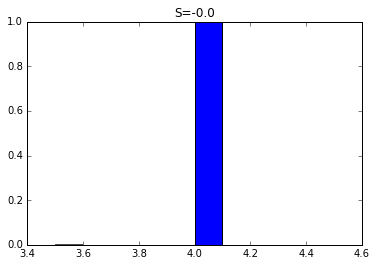

In [39]:
r={}
d={0:[]}
n_d=0
test=[3,3,3]
r_hist=[dict(r)]
while n_d<3:
    for i in xrange(test[n_d]):
        r=get_route(r)
    r_hist.append(dict(r))
    ds=decision(r,d[n_d])
    #print ds,d
    l=list(d[n_d])
    l.append(ds)
    #print l
    d[n_d+1]=l
    #print d
    n_d+=1
print d
landscape(r,d[n_d])
#print 'edge',e_entropy(r,d[0])

{(3, 4, 2, 1): 7.0, (2, 1, 3, 4): 4.0, (1, 3, 2, 4): 8.0} [(3, 4), (1, 3), (2, 1)]
edge 1.09861228867


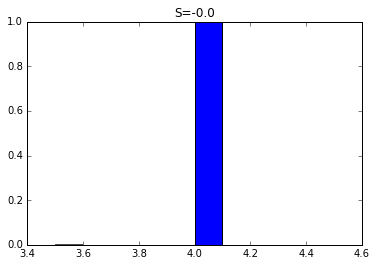

In [37]:
t=3
tau=3
print r_hist[t], d[tau]
landscape(r_hist[t],d[tau])
print 'edge',e_entropy(r_hist[t],d[tau])

In [ ]:
print r_hist[0], d[0]
print r_hist[1], d[1]
print r_hist[2], d[2]
print r_hist[3], d[3]

In [ ]:
def make_KD(r_hist,d):
    

In [ ]:
k=nx.DiGraph()
for 

In [42]:
print r_hist[0]
print r_hist[1]
print r_hist[2]
print r_hist[3]
print set(r_hist[1])-set(r_hist[0])

{}
{(2, 4, 1, 3): 7.0, (1, 4, 3, 2): 7.0, (1, 2, 3, 4): 6.0}
{(2, 1, 3, 4): 4.0, (3, 1, 4, 2): 7.0, (4, 3, 1, 2): 4.0, (2, 4, 1, 3): 7.0, (1, 4, 3, 2): 7.0, (1, 2, 3, 4): 6.0}
{(2, 1, 3, 4): 4.0, (3, 1, 4, 2): 7.0, (3, 2, 4, 1): 9.0, (4, 3, 1, 2): 4.0, (1, 4, 3, 2): 7.0, (1, 4, 2, 3): 9.0, (2, 4, 1, 3): 7.0, (1, 2, 3, 4): 6.0}
set([(2, 4, 1, 3), (1, 2, 3, 4), (1, 4, 3, 2)])


In [43]:
k=nx.DiGraph()
t=0
tau=0
for i in xrange(len(r_hist)):
    nodes=list(set(r_hist[i+1])-set(r_hist[i]))
    for n in nodes:
        k.add_node(n,t=t)
        t+=1

    
    
    

4